In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
candy = pd.read_csv('Candy_edited.csv')

In [3]:
candy #df with tootsie 

,competitorname,chocolate,fruity,is_chocolate,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,is_pluribus,sugarpercent,pricepercent,winpercent,win_cat
0,100 Grand,1,0,chocolate,1,0,0,1,0,1,0,bar,73.199999,86.000001,66.971725,often
1,3 Musketeers,1,0,chocolate,0,0,1,0,0,1,0,bar,60.399997,51.099998,67.602936,often
2,One dime,0,0,neither,0,0,0,0,0,0,0,neither,1.100000,11.600000,32.261086,sometimes
3,One quarter,0,0,neither,0,0,0,0,0,0,0,neither,1.100000,51.099998,46.116505,sometimes
4,Air Heads,0,1,fruity,0,0,0,0,0,0,0,neither,90.600002,51.099998,52.341465,often
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,fruity,0,0,0,0,0,0,0,neither,22.000000,11.600000,45.466282,sometimes
81,Warheads,0,1,fruity,0,0,0,0,1,0,0,neither,9.300000,11.600000,39.011898,sometimes
82,Welch's Fruit Snacks,0,1,fruity,0,0,0,0,0,0,1,pluribus,31.299999,31.299999,44.375519,sometimes
83,Werther's Original Caramel,0,0,neither,1,0,0,0,1,0,0,neither,18.600000,26.699999,41.904308,sometimes


In [4]:
candy_1 = candy.copy()

In [5]:
print(candy_1[candy_1['is_chocolate']=='both'].index.values)

[74]


In [6]:
candy_1.drop([74], inplace = True)

In [7]:
candy_1 #df without tootsie

,competitorname,chocolate,fruity,is_chocolate,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,is_pluribus,sugarpercent,pricepercent,winpercent,win_cat
0,100 Grand,1,0,chocolate,1,0,0,1,0,1,0,bar,73.199999,86.000001,66.971725,often
1,3 Musketeers,1,0,chocolate,0,0,1,0,0,1,0,bar,60.399997,51.099998,67.602936,often
2,One dime,0,0,neither,0,0,0,0,0,0,0,neither,1.100000,11.600000,32.261086,sometimes
3,One quarter,0,0,neither,0,0,0,0,0,0,0,neither,1.100000,51.099998,46.116505,sometimes
4,Air Heads,0,1,fruity,0,0,0,0,0,0,0,neither,90.600002,51.099998,52.341465,often
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,fruity,0,0,0,0,0,0,0,neither,22.000000,11.600000,45.466282,sometimes
81,Warheads,0,1,fruity,0,0,0,0,1,0,0,neither,9.300000,11.600000,39.011898,sometimes
82,Welch's Fruit Snacks,0,1,fruity,0,0,0,0,0,0,1,pluribus,31.299999,31.299999,44.375519,sometimes
83,Werther's Original Caramel,0,0,neither,1,0,0,0,1,0,0,neither,18.600000,26.699999,41.904308,sometimes


Extra Notes:
- need to make cross table
- cant just copy-paste barchart code
- put things in title case 
- axis label can be question
- will need 3 colors (gradient doesn't make sense)
- code wise: blank figures 
    - call plt.show and then put plt.savefig under
    - double check after you submit 
- be careful with ranges on axes 
- option 2 is more straight forward than option 1


In [8]:

candy_new = candy_1[['win_cat','is_chocolate']].copy()


In [9]:
candy_new

,win_cat,is_chocolate
0,often,chocolate
1,often,chocolate
2,sometimes,neither
3,sometimes,neither
4,often,fruity
...,...,...
80,sometimes,fruity
81,sometimes,fruity
82,sometimes,fruity
83,sometimes,neither


NEXT: You will group the data by the categorical win frequency and within these groups show the relative percentages of
each type of candy.

In [10]:
candy_new['win_cat'].value_counts()

sometimes    42
often        34
a_lot         5
rarely        3
Name: win_cat, dtype: int64

In [11]:
candy_new['is_chocolate'].value_counts()

fruity       37
chocolate    36
neither      11
Name: is_chocolate, dtype: int64

In [66]:
raw_table = pd.crosstab(candy_new['win_cat'], candy_new['is_chocolate'], normalize = 'index').reindex(columns = 
                                                        ['fruity','chocolate','neither'], index = ['rarely','sometimes','often','a_lot'])

raw_table.rename(index={'sometimes': 'Sometimes', 'often': 'Often', 'a_lot':'A Lot', 'rarely':'Rarely'}, inplace=True)
raw_table.rename(columns={'fruity': 'Fruity', 'chocolate': 'Chocolate', 'neither': 'Neither'}, inplace=True)                                                                                                     
                                                       
raw_table

is_chocolate,Fruity,Chocolate,Neither
win_cat,,,
Rarely,0.666667,0.000000,0.333333
Sometimes,0.571429,0.190476,0.238095
Often,0.323529,0.676471,0.000000
A Lot,0.000000,1.000000,0.000000


In [67]:
table = pd.crosstab(candy_new['win_cat'], candy_new['is_chocolate']).reindex(columns = 
                                                        ['fruity','chocolate','neither'],
                                                                index = ['rarely','sometimes','often','a_lot'])
table.rename(index={'rarely':'Rarely','sometimes': 'Sometimes', 'often': 'Often', 'a_lot':'A Lot'}, inplace = True) 
table.rename(columns={'fruity': 'Fruity', 'chocolate': 'Chocolate', 'neither': 'Neither'}, inplace=True)
table

is_chocolate,Fruity,Chocolate,Neither
win_cat,,,
Rarely,2,0,1
Sometimes,24,8,10
Often,11,23,0
A Lot,0,5,0


In [68]:
### PART 1

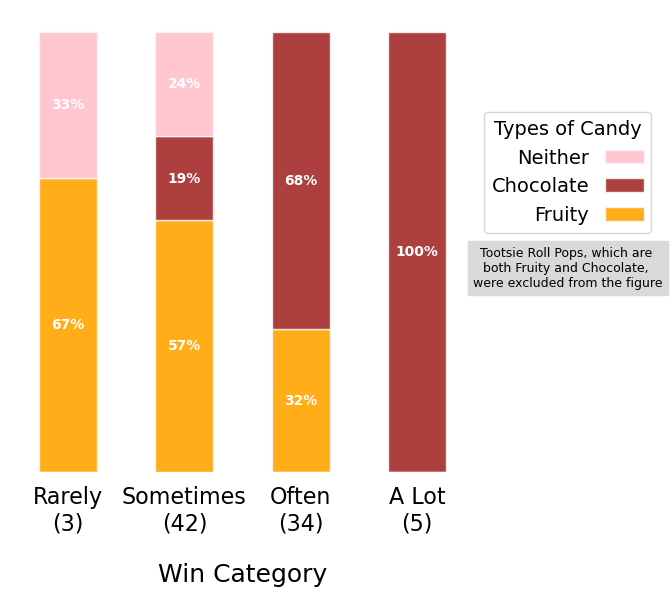

In [69]:
ax = raw_table.plot.bar(stacked = True, color = ['orange','brown', 'pink'] , figsize = [6,6], 
                    rot = 0, fontsize = 16, alpha = 0.9, ec = 'whitesmoke')
[ax.spines[i].set_visible(False) for i in ax.spines]
ax.tick_params(length = 0)
ax.get_yaxis().set_visible(False) 
plt.xlabel('Win Category', fontsize = 18, labelpad = 20)
plt.legend(bbox_to_anchor = [1,1]) #just moving it out of the way

for i in range(len(ax.patches)):
    if ax.patches[i].get_height() !=0:
        x,y,width,height = ax.patches[i].get_x(), ax.patches[i].get_y(), ax.patches[i].get_width(),ax.patches[i].get_height()
        center_x = x+width/2
        center_y = y+height/2
        label = f'{height*100:.0f}%'
        if i > 3:
            color = 'white'
        plt.text(center_x, center_y, label, ha = 'center', va = 'center', color = color, weight = 'bold')

sums = table.sum(axis = 1)
x_labels = [sums.index[i] + '\n(' + str(sums[i]) + ')' for i in range(len(sums))]

plt.xticks([0,1,2,3], labels = x_labels)
plt.tick_params(pad = 10)
handles,labels = ax.get_legend_handles_labels()
#print(handles,labels)
leg = plt.legend(handles = handles[::-1], labels = labels[::-1], bbox_to_anchor = [1.4, 0.8], title = 'Types of Candy', 
                 title_fontsize = 14, fontsize = 14, markerfirst = False, frameon = True, handlelength=2.0) 
extra_text = 'Tootsie Roll Pops, which are \nboth Fruity and Chocolate, \nwere excluded from the figure'
plt.text(1.2, 0.44, extra_text, transform=plt.gca().transAxes, fontsize=9, color='black', backgroundcolor='0.85',ha='center', va='center' )

leg.get_title().set_multialignment('center')
plt.savefig('stacked_bar.png',bbox_inches='tight')
plt.show()
#sums.index[i] + '\n(n=' + str(sums[i]) + ')' for i in range(len(sums))

In [65]:
choc = candy[candy['chocolate'] == 1]
non_choc = candy[candy['chocolate'] == 0]

In [24]:
choc_win = choc['winpercent']
non_choc_win = non_choc['winpercent']
choc_price = choc['pricepercent']
non_choc_price = non_choc['pricepercent']


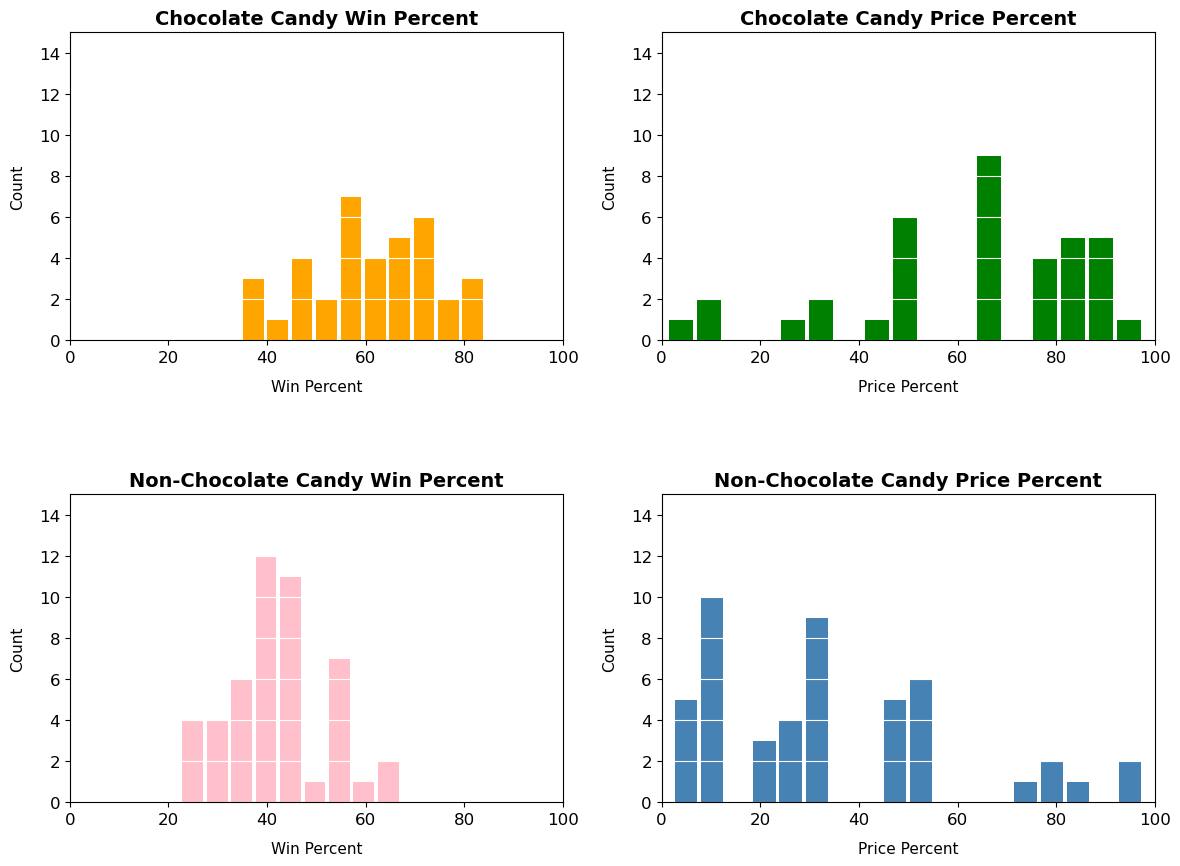

In [25]:
f,[[ax_hist,ax_2_hist],[ax_1_hist,ax_3_hist]] = plt.subplots(2, 2, figsize = (14,10), 
                                                             gridspec_kw = {'wspace':0.2, 'hspace':0.5})
#f.suptitle('Comparing Winningness and Price for Chocolate and Non Chocolate Candies', fontsize = 17) 
#ax_hist.legend(handles=[legend_chocolate, legend_non_chocolate], loc='upper right', fontsize=LABEL_SIZE)

#constants and params
LABEL_SIZE = 11
TICK_SIZE = 12
#n_bins = 15

#histogram
ax_hist.hist(choc_win, rwidth = 0.85, bins = 10, color = 'orange')
[ax_hist.spines[i].set_visible(True) for i in ax_hist.spines]
ax_hist.tick_params(labelsize = TICK_SIZE) #leave as plt in first instance and ask why nothing changed....
ax_hist.grid(axis = 'y',color= 'white')
ax_hist.set_xlabel('Win Percent', fontsize = LABEL_SIZE, labelpad = 10) #change to set_xlabel
ax_hist.set_ylabel('Count', fontsize = LABEL_SIZE, labelpad = 10)
ax_hist.set_title('Chocolate Candy Win Percent', fontsize = 14, fontweight='bold')
ax_hist.set_xlim(0,100)
ax_hist.set_ylim(0,15)

ax_1_hist.hist(non_choc_win, rwidth = 0.85, bins = 9, color = 'pink')
[ax_1_hist.spines[i].set_visible(True) for i in ax_hist.spines]
ax_1_hist.tick_params(labelsize = TICK_SIZE) #leave as plt in first instance and ask why nothing changed....
ax_1_hist.grid(axis = 'y',color= 'white')
ax_1_hist.set_xlabel('Win Percent', fontsize = LABEL_SIZE, labelpad = 10) #change to set_xlabel
ax_1_hist.set_ylabel('Count', fontsize = LABEL_SIZE, labelpad = 10)
ax_1_hist.set_title('Non-Chocolate Candy Win Percent', fontsize = 14, fontweight='bold')
ax_1_hist.set_xlim(0,100)
ax_1_hist.set_ylim(0,15)

ax_2_hist.hist(choc_price, rwidth = 0.85, bins = 17, color = 'green')
[ax_2_hist.spines[i].set_visible(True) for i in ax_hist.spines]
ax_2_hist.tick_params(labelsize = TICK_SIZE) #leave as plt in first instance and ask why nothing changed....
ax_2_hist.grid(axis = 'y',color= 'white')
ax_2_hist.set_xlabel('Price Percent', fontsize = LABEL_SIZE, labelpad = 10) #change to set_xlabel
ax_2_hist.set_ylabel('Count', fontsize = LABEL_SIZE, labelpad = 10)
ax_2_hist.set_title('Chocolate Candy Price Percent', fontsize = 14, fontweight='bold')
ax_2_hist.set_xlim(0,100)
ax_2_hist.set_ylim(0,15)

ax_3_hist.hist(non_choc_price, rwidth = 0.85, bins = 18 , color = 'steelblue')
[ax_3_hist.spines[i].set_visible(True) for i in ax_hist.spines]
ax_3_hist.tick_params(labelsize = TICK_SIZE) #leave as plt in first instance and ask why nothing changed....
ax_3_hist.grid(axis = 'y',color= 'white')
ax_3_hist.set_xlabel('Price Percent', fontsize = LABEL_SIZE, labelpad = 10) #change to set_xlabel
ax_3_hist.set_ylabel('Count', fontsize = LABEL_SIZE, labelpad = 10)
ax_3_hist.set_title('Non-Chocolate Candy Price Percent', fontsize = 14, fontweight='bold')
ax_3_hist.set_xlim(0,100)
ax_3_hist.set_ylim(0,15)



plt.savefig('subplots.png', bbox_inches = 'tight', facecolor = 'white')

Part 3

In [26]:
candy_type = candy[['is_chocolate', 'winpercent']].copy()
#candy_type['is_chocolate'] = candy_type['is_chocolate'].str.title()
candy_specific_type = candy[['competitorname', 'is_chocolate', 'winpercent']].copy()

In [27]:
#candy_type.rename(index={'sometimes': 'Sometimes', 'often': 'Often', 'a_lot':'A Lot', 'rarely':'Rarely'}, inplace=True)
candy_type.rename(columns={'fruity': 'Fruity', 'chocolate': 'Chocolate', 'neither': 'Neither'}, inplace=True)                                                                          

In [28]:
max_indices = candy_specific_type.groupby('is_chocolate')['winpercent'].idxmax()
max_indices

is_chocolate
both         74
chocolate    52
fruity       68
neither      46
Name: winpercent, dtype: int64

In [29]:
max_winners = candy_specific_type.groupby('is_chocolate', as_index=False)['winpercent'].max()
max_winners

,is_chocolate,winpercent
0,both,48.982651
1,chocolate,84.180290
2,fruity,67.037628
3,neither,46.296597


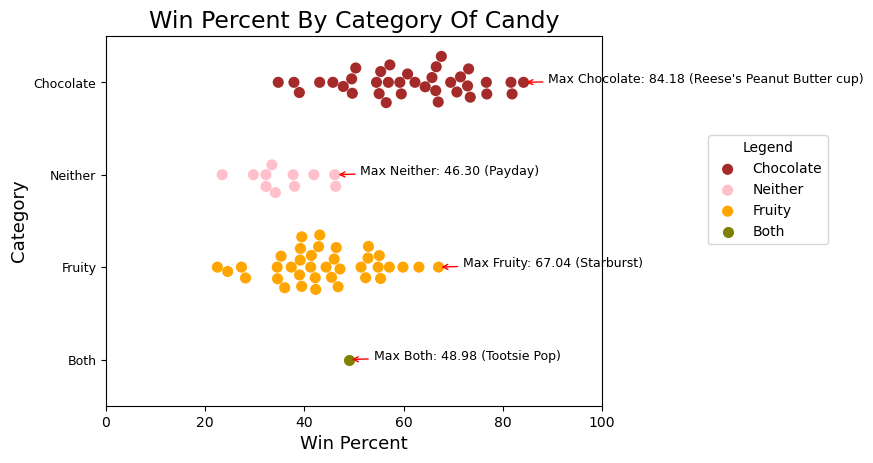

In [31]:
import seaborn as sns

ax = sns.swarmplot(data=candy_type, x = 'winpercent', y = 'is_chocolate', 
                  orient='h', legend = True, hue = 'is_chocolate',color='blue', palette=['brown', 'pink', 'orange', 'olive'] , size=8, 
                  edgecolor='gray', dodge = False) 
ax.set_xlabel("Win Percent", fontsize = 13)
ax.set_ylabel("Category".title(), fontsize = 13)
ax.set_title("Win Percent by Category of Candy".title(), fontsize = 17)
ax.set_xlim(0, 100)

y_ticks = ax.get_yticks()
y_labels = [label.get_text().title() for label in ax.get_yticklabels()]
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels, fontsize=9)

for idx in max_indices:
    row = candy_specific_type.loc[idx]
    x_coord = row['winpercent']
    y_coord = row['is_chocolate']
    competitor_name = row['competitorname']
    ax.annotate(f"Max {y_coord.capitalize()}: {x_coord:.2f} ({competitor_name})", xy=(x_coord, y_coord),
                xytext=(x_coord + 5, y_coord), arrowprops=dict(arrowstyle="->", color="red"), fontsize = 9)


ax.legend(title="Legend", fontsize = 10,labels=["Chocolate", "Neither",'Fruity', 'Both'], bbox_to_anchor=(1.2, 0.75), loc=2)
plt.savefig('swarmplot.png', bbox_inches = 'tight', facecolor = 'white')
